In [1]:
import networkx as nx
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt 
from networkx.algorithms import community
import pickle
import csv
#import chart_studio.plotly as py
#from plotly.graph_objs import *
import re
import string
#from textblob import TextBlob
#import preprocessor as p
#from nltk.corpus import stopwords
#from nltk.tokenize import word_tokenize
#from nltk.corpus import reuters

In [2]:
#df = pd.read_csv('/content/all_hashtags_combined.csv') 

In [3]:
G = nx.read_gpickle("Our_Gragh_0.4Sim")


In [6]:
print(f"There are {G.number_of_nodes()} nodes and {G.number_of_edges()} edges present in the Graph")

There are 533 nodes and 1211 edges present in the Graph


In [7]:
colors_central_nodes = ['orange', 'red']
pos= nx.spring_layout(G,scale=1) #default to scale=1


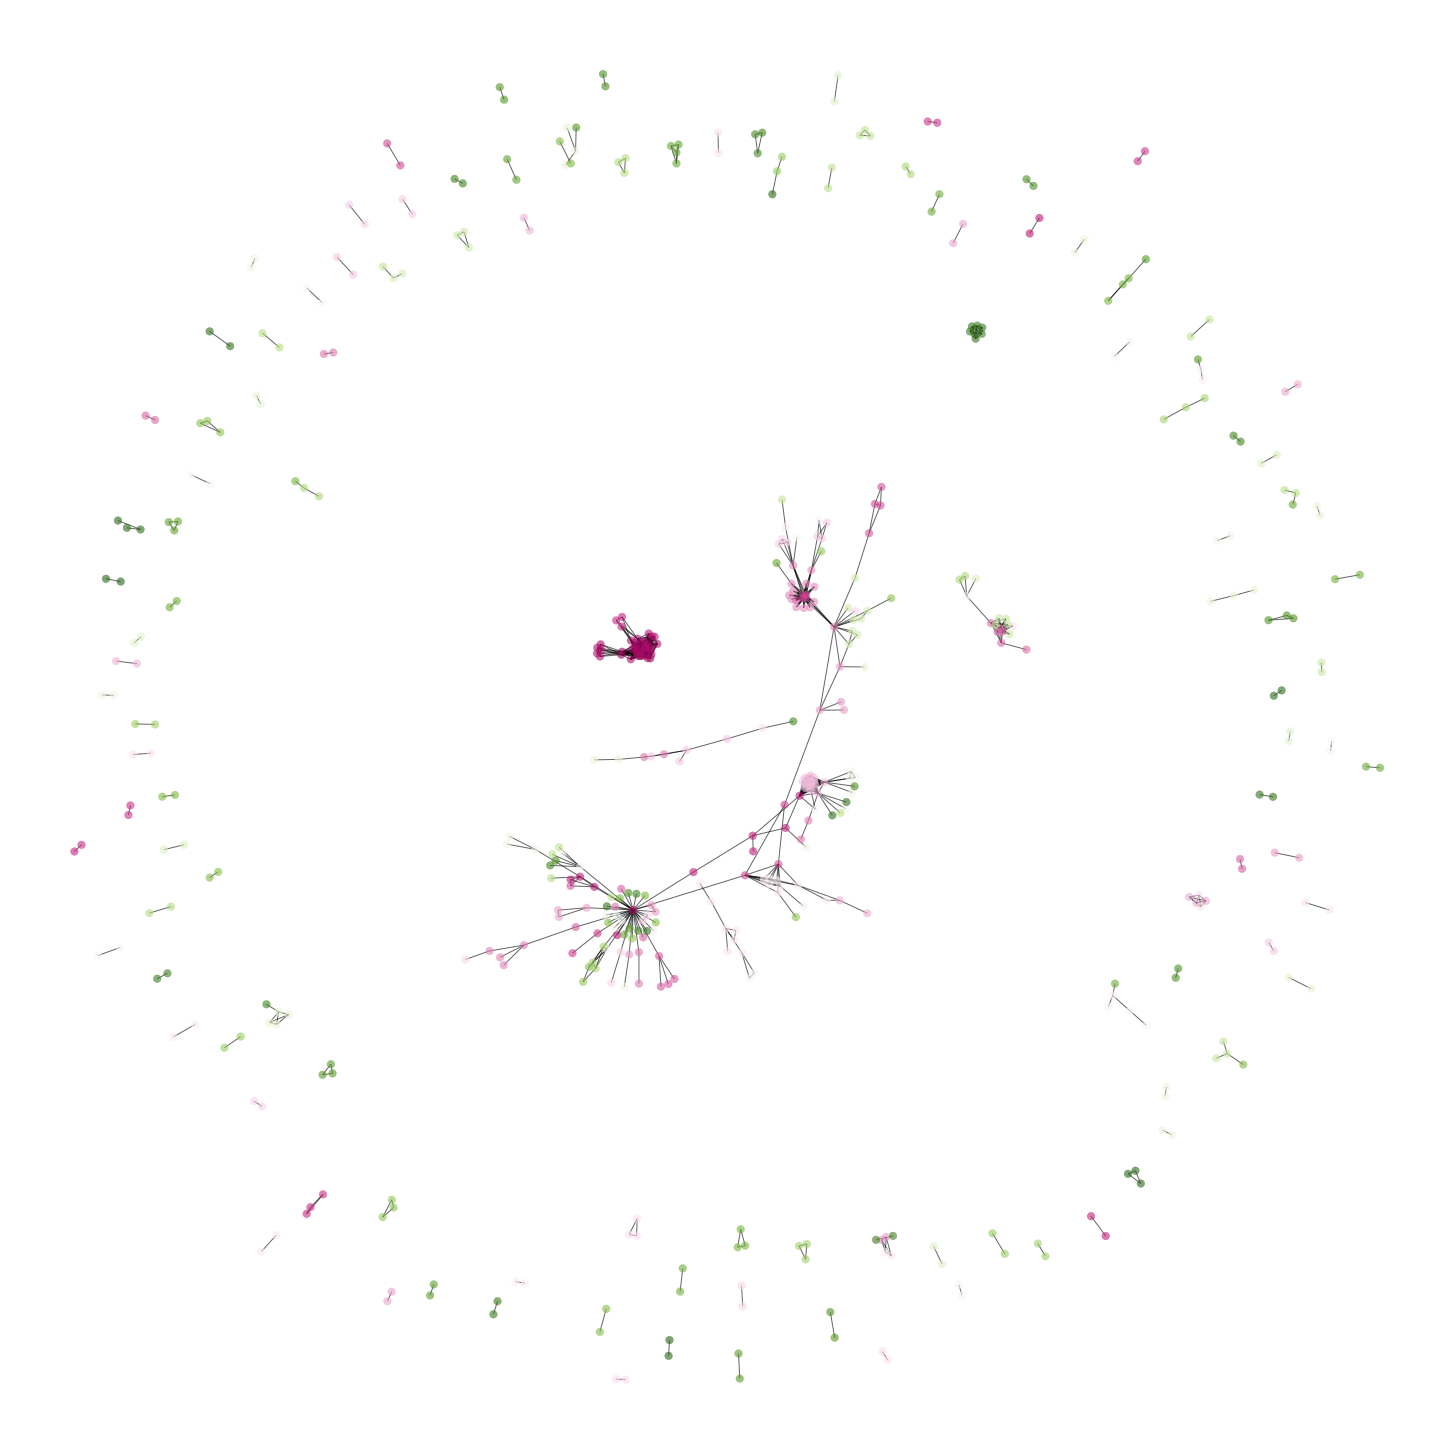

In [8]:
plt.figure(figsize = (20,20))
nx.draw(G, node_color=range(533), cmap=plt.cm.PiYG, edge_color="black", linewidths=0.3, node_size=60,
        alpha=0.6, with_labels=False)
plt.savefig('Our_Whole_Graph.png')
plt.show()

In [9]:
degrees = [val for (node, val) in G.degree()]

In [10]:
print(f"The maximum degree of the Graph is {np.max(degrees)}")   
print(f"The minimum degree of the Graph is {np.min(degrees)}")

The maximum degree of the Graph is 40
The minimum degree of the Graph is 1


In [11]:
print(f"The average degree of the nodes in the Graph is {np.mean(degrees):.1f}")  
print(f"The most frequent degree of the nodes found in the Graph is {stats.mode(degrees)[0][0]}")

The average degree of the nodes in the Graph is 4.5
The most frequent degree of the nodes found in the Graph is 1


In [12]:
if nx.is_connected(G):
    print("The graph is connected")
else:
    print("The graph is not connected")

The graph is not connected


In [13]:
print(f"There are {nx.number_connected_components(G)} connected components in the Graph")

There are 124 connected components in the Graph


In [14]:
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
largest_subgraph = G.subgraph(Gcc[0])

In [15]:
print(f"There are {largest_subgraph.number_of_nodes()} nodes and {largest_subgraph.number_of_edges()} \edges present in the largest component of the Graph")

There are 168 nodes and 412 \edges present in the largest component of the Graph


In [16]:
if nx.is_connected(largest_subgraph):
    print("The graph is connected")
else:
    print("The graph is not connected")

The graph is connected


In [17]:
print(f"The average clustering coefficient is {nx.average_clustering(largest_subgraph)} in the largest subgraph")
print(f"The transitivity of the largest subgraph is {nx.transitivity(largest_subgraph)}")

The average clustering coefficient is 0.4127662230944733 in the largest subgraph
The transitivity of the largest subgraph is 0.659171597633136


In [18]:
print(f"The diameter of our Graph is {nx.diameter(largest_subgraph)}")
print(f"The average distance between any two nodes is {nx.average_shortest_path_length(largest_subgraph):.2f}")

The diameter of our Graph is 14
The average distance between any two nodes is 5.71


In [19]:
graph_centrality = nx.degree_centrality(largest_subgraph)

In [20]:
max_de = max(graph_centrality.items())

In [21]:
graph_closeness = nx.closeness_centrality(largest_subgraph)

In [22]:
max_clo = max(graph_closeness.items())

In [23]:
graph_betweenness = nx.betweenness_centrality(largest_subgraph, normalized=True, endpoints=False)

In [24]:
max_bet = max(graph_betweenness.items())

In [25]:
print(f"the node with id {max_de[0]} has a degree centrality of {max_de[1]:.2f} which is the maximum of the Graph")
print(f"the node with id {max_clo[0]} has a closeness centrality of {max_clo[1]:.2f} which is the maximum of the Graph")
print(f"the node with id {max_bet[0]} has a betweenness centrality of {max_bet[1]:.2f} which is the maximum of the Graph")

the node with id 1235145515089760257 has a degree centrality of 0.01 which is the maximum of the Graph
the node with id 1235145515089760257 has a closeness centrality of 0.14 which is the maximum of the Graph
the node with id 1235145515089760257 has a betweenness centrality of 0.00 which is the maximum of the Graph


In [26]:
node_and_degree = largest_subgraph.degree()
colors_central_nodes = ['red']
#central_nodes = ['1235145515089760257']


In [29]:
pos = nx.spring_layout(largest_subgraph, k=0.03)
colors = plt.cm.rainbow(np.linspace(0, 5, 168))

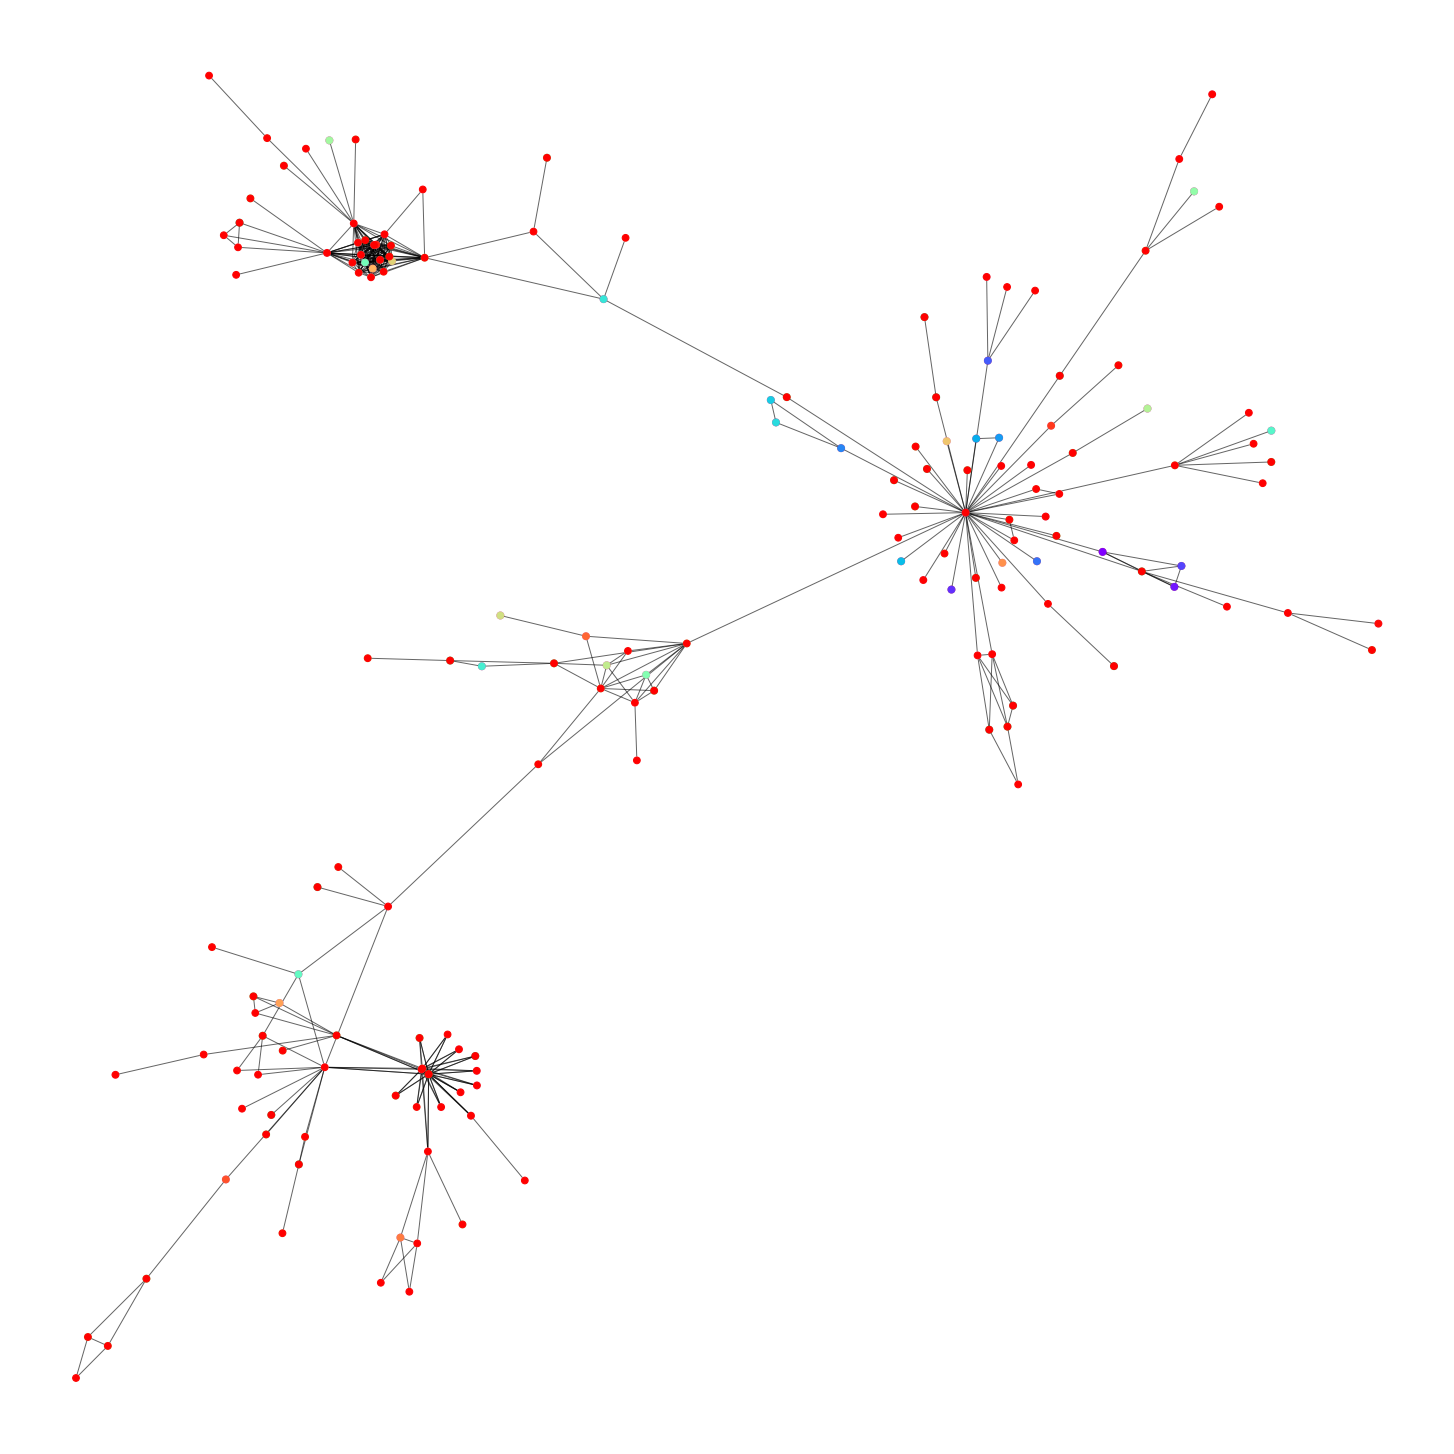

In [30]:
plt.figure(figsize = (20,20))
nx.draw(largest_subgraph, pos=pos, node_color=range(168), 
        cmap=plt.cm.PiYG, edge_color="black", linewidths=0.3,
        node_size=60, alpha=0.6, with_labels=False)
nx.draw_networkx_nodes(largest_subgraph, pos=pos,
                        node_size=45,
                       node_color=colors)

plt.savefig('Largest_subragh.png')
plt.show()
